In [1]:
import h5py
import random
import hdfdict
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
def extract_data(fname):
    """
    This function reads the objects from the hdf5 file and 
    returns a dictionary object 

    Args:
        fname (string): File name 

    Returns:
        dictionary: object with keys and values of objects from file
    """

    data = {}

    # Read the data from the file 
    with h5py.File(fname, 'r') as hf:

        # Convert hdf5 data to numpy array
        values = [np.array(val) for val in hf.values()]

        # Add the data to a dictionary 
        data = dict(zip(hf.keys(),values))

        # Verify shape of the n-dimensional arrays
        for key, value in data.items():
            print('Shape of',key, ':', np.shape(value))  
            
    return data

network_params = extract_data('mnist_network_params.hdf5')
test_dataset = extract_data('mnist_testdata.hdf5')

Shape of W1 : (200, 784)
Shape of W2 : (100, 200)
Shape of W3 : (10, 100)
Shape of b1 : (200,)
Shape of b2 : (100,)
Shape of b3 : (10,)
Shape of xdata : (10000, 784)
Shape of ydata : (10000, 10)


In [3]:
def ReLu(X):
    """ This function computes and returns the ReLu value which is max(0,x). 
    ReLu activation function performs a threshold operation to 
    each input element where less than zero values are set to zero

                ReLu(x) = max(0,x)

    Args:
        X (matrix): The input matrix whose ReLu needs to be computed

    Returns:
        matrix: ReLu computed matrix
    """
    return np.maximum(0,X)

def Softmax(X):
    """The Softmax function produces an output which is a range 
    of values between 0 and 1, with the sum of the probabilities 
    been equal to 1 and,
    
                Softmax(x) = exp(x_i)/sum(exp(x_i))

    Args:
        X (matrix): Input matrix

    Returns:
        matrix: Softmax
    """
    exp = np.exp(X)
    exp_sum = np.sum(np.exp(X))
    return exp/exp_sum 

In [4]:
# def MLP(params,xdata):
#     """This function creates an MLP to classify each 784-dimensional 
#     image into the target 10-dimensional output. It uses ReLU activation 
#     for the two hidden layers and softmax activation in the output layer.


#     Args:
#         params (dictionary): The weights and biases
#         x (nd array): The image data

#     Returns:
#         matrix: The output/computed matrix of the MLP
#     """
#     output = []
#     for x in xdata:
#         h1 = ReLu(np.dot(params["W1"], x) + params["b1"]) # calculate first hidden layer activations 
#         h2 = ReLu(np.dot(params["W2"], h1) + params["b2"]) # calculate second hidden layer activations 
#         out = Softmax(np.dot(params["W3"], h2) + params["b3"]) # output neuron 
#         output.append(out)

#     return output

# MLP_output = MLP(network_params,test_dataset["xdata"])
# class_output = np.argmax(MLP_output, axis=1)
# label_class = np.argmax(test_dataset["ydata"], axis = 1)
# accuracy_val = np.sum(class_output == label_class)

# print("Correctly classified images are {}".format(accuracy_val),"out of",len(test_dataset["xdata"]))


def MLP(params,x):
    """This function creates an MLP to classify each 784-dimensional 
    image into the target 10-dimensional output. It uses ReLU activation 
    for the two hidden layers and softmax activation in the output layer.


    Args:
        params (dictionary): The weights and biases
        x (nd array): The image data

    Returns:
        matrix: The output/computed matrix of the MLP
    """
    output = []
    s1 = np.dot(params["W1"], x) + params["b1"]
    print("s1 -",s1)
    h1 = ReLu(s1) # calculate first hidden layer activations 
    print("a1 -",h1)
    s2 = np.dot(params["W2"], h1) + params["b2"]
    print("s2 -",s2)
    h2 = ReLu(s2) # calculate second hidden layer activations 
    print("a2 -",h2)
    s3 = np.dot(params["W3"], h2) + params["b3"]
    print("s3 -",s3)
    out = Softmax(s3) # output neuron 
    print("a3 -",out)
    output.append(out)

    return out
network_params = {
    "W1" : np.array([[1,-2, 1],[3,4,-2]]),
    "W2" : np.array([[1 ,-2],[3,4]]),
    "W3" : np.array([[2,2],[3,-3],[2,1]]),
    "b1" : np.array([1 ,-2]),
    "b2" : np.array([1 ,0]),
    "b3" : np.array([0 ,-4 ,-2])
}
x_in = np.array([1,-1,1])
print(x_in)
MLP(network_params,x_in)

Correctly classified images are 9790 out of 10000


In [5]:
correctly_classified = np.nonzero(class_output == label_class)[0]
print("Correctly classified Indices", correctly_classified)

incorrectly_classified = np.nonzero(class_output != label_class)[0]
print("Incorrectly classified Indices", incorrectly_classified)

Correctly classified Indices [   0    1    2 ... 9997 9998 9999]
Incorrectly classified Indices [   8  115  247  321  340  381  445  449  495  551  582  613  619  646
  659  684  707  720  900  947  951  965 1003 1014 1032 1039 1112 1128
 1156 1178 1182 1224 1226 1232 1242 1247 1299 1319 1328 1378 1444 1522
 1530 1549 1553 1609 1621 1626 1670 1681 1709 1717 1790 1850 1878 1901
 1911 1940 1941 1984 1987 2035 2070 2098 2109 2118 2130 2135 2182 2185
 2272 2280 2293 2387 2414 2488 2512 2514 2582 2597 2607 2648 2654 2877
 2896 2921 2939 2953 2995 3060 3062 3073 3117 3342 3422 3490 3503 3520
 3533 3549 3558 3559 3597 3702 3718 3727 3757 3780 3811 3818 3853 3869
 3893 3906 3926 3941 3943 3985 4065 4075 4078 4093 4123 4163 4176 4199
 4201 4224 4248 4271 4289 4294 4384 4425 4497 4534 4536 4601 4671 4740
 4761 4807 4823 4839 4860 4879 4880 4956 5138 5199 5331 5457 5634 5642
 5676 5734 5835 5887 5936 5937 5955 5973 5981 6011 6024 6045 6046 6059
 6505 6558 6571 6572 6597 6625 6651 6755 6783 6847 7

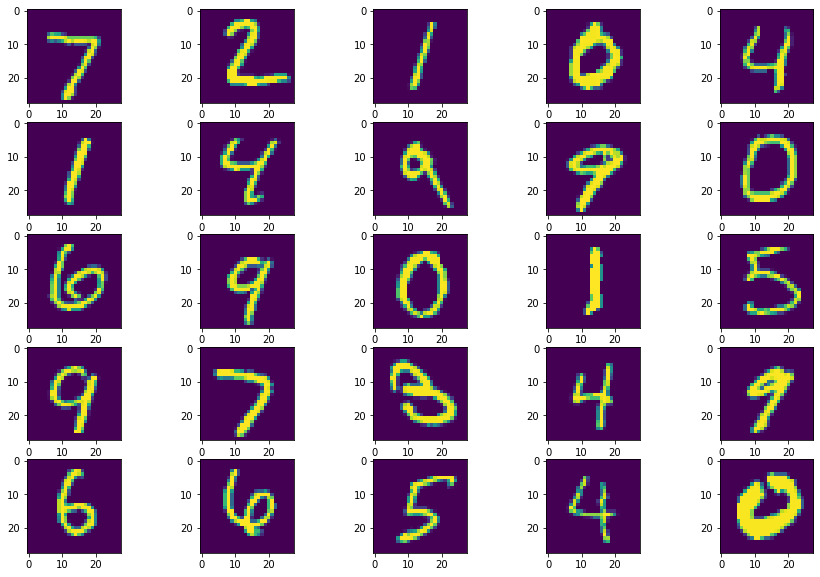

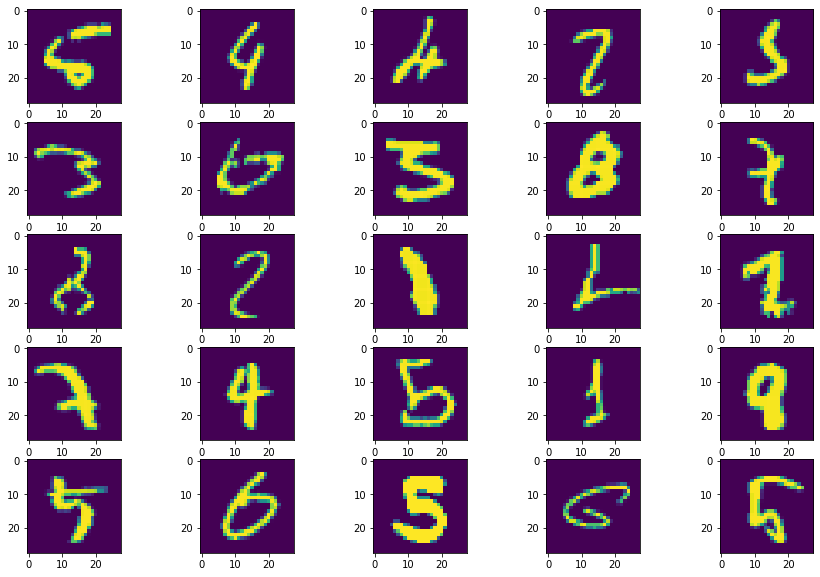

In [6]:
k=0
f, axarr = plt.subplots(5,5,figsize=(15,10))
for i in range(0,5):
    for j in range(0,5):
        axarr[i,j].imshow(test_dataset["xdata"][correctly_classified[k]].reshape(28,28))
        k+=1

k=0
f, axarr = plt.subplots(5,5,figsize=(15,10))
for i in range(0,5):
    for j in range(0,5):
        axarr[i,j].imshow(test_dataset["xdata"][incorrectly_classified[k]].reshape(28,28))
        k+=1

### Is the correct class obvious to you in the incorrect cases?  
No, the correct class is not obvious for all the incorreclty classified images. We cannot certain the class for few images. But we still can classify most of the incorrectly classified images through visual analysis.

In [7]:
data_dic = extract_data('lms_fun_v3.hdf5')

Shape of matched_10_v : (600, 501, 3)
Shape of matched_10_x : (600, 501)
Shape of matched_10_y : (600, 501)
Shape of matched_10_z : (600, 501)
Shape of matched_3_v : (600, 501, 3)
Shape of matched_3_x : (600, 501)
Shape of matched_3_y : (600, 501)
Shape of matched_3_z : (600, 501)
Shape of mismatched_v : (600, 501, 3)
Shape of mismatched_x : (600, 501)
Shape of mismatched_y : (600, 501)
Shape of timevarying_coefficents : (501, 3)
Shape of timevarying_v : (501, 3)
Shape of timevarying_x : (501,)
Shape of timevarying_y : (501,)
Shape of timevarying_z : (501,)


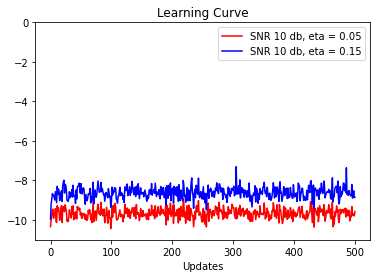

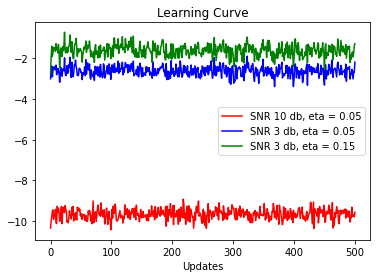

In [8]:
step = [0.05,0.15]  

v = [data_dic['matched_10_v'], data_dic['matched_3_v']]
z = [data_dic['matched_10_z'], data_dic['matched_3_z']]

def compute_mse(err_mat):
    inp = err_mat
    sq_sum = []
    for j in range(len(inp[0])):
        res = 0
        for i in range(len(inp)):
            res+=inp[i][j]
        sq_sum.append(10*np.log10(res/len(inp)))
    return sq_sum

def lms(step,v,z):
    l = len(v)
    w = np.array([0,0,0])
    se = []
    #E = 0
    for i in range(l):
        E = []
        for j in range(len(v[i])):
            e = z[i][j]-w.T@v[i][j]
            w = np.add(w,step * (e) * v[i][j])
            E.append(e**2)
        se.append(E)
    # Taking MSE (average of (z − zˆ )2) averaged over all sequences
    mse = compute_mse(se)
    return w, mse

w_1,mse_1 = lms(step[0],v[0],z[0])
w_2,mse_2 = lms(step[1],v[0],z[0])
w_3,mse_3 = lms(step[0],v[1],z[1])
w_4,mse_4 = lms(step[1],v[1],z[1])

# show results
plt.title("Learning Curve");
plt.xlabel("Updates")
plt.ylim(([-11,0]))
plt.plot(mse_1,"r", label="SNR 10 db, eta = 0.05")
plt.plot(mse_2,"b", label="SNR 10 db, eta = 0.15")
plt.legend()
plt.show()

# show results
plt.title("Learning Curve");
plt.xlabel("Updates")
plt.plot(mse_1,"r", label="SNR 10 db, eta = 0.05")
plt.plot(mse_3,"b", label="SNR 3 db, eta = 0.05")
plt.plot(mse_4,"g", label="SNR 3 db, eta = 0.15")
plt.legend()
plt.show()

(c) How does the MSE for these learning curves compare to the LMMSE in the analytical solution above? Note: you may also try to use yn in place of zn if you would like to explore (optional).

The LMMSE calculated is much lower as compared to MSE of the these learing curves.

(d) What is the largest value of η that does not lead to divergent MSE?

From the above plots, we can observe that for η < 3e-5, the MSE starts to diverge. So η = 3e-5 would be the limiting factor for a convergent MSE.


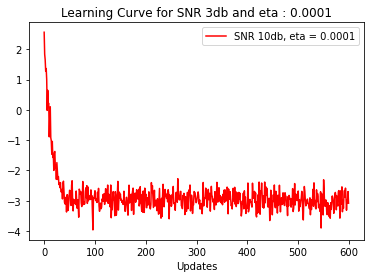

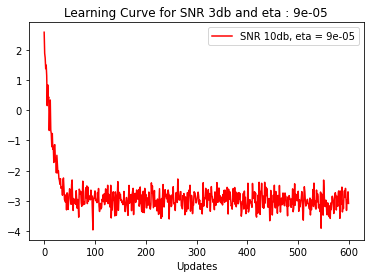

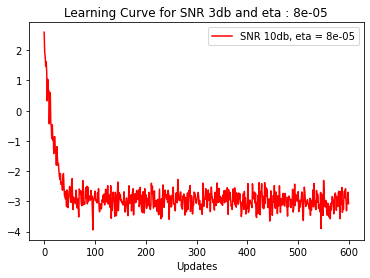

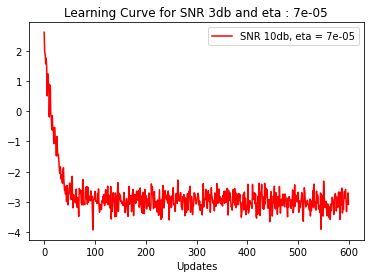

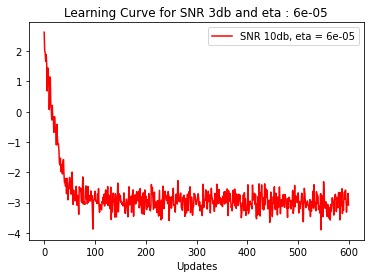

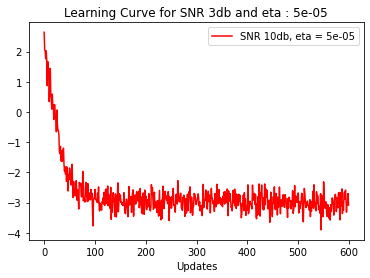

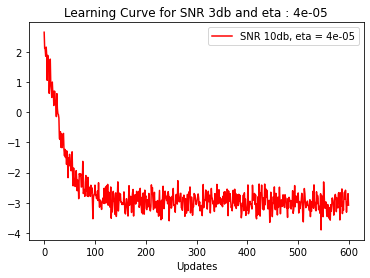

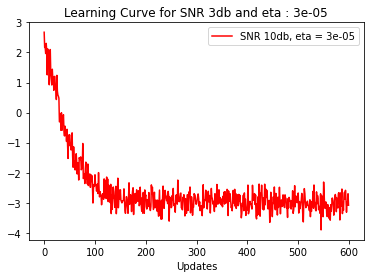

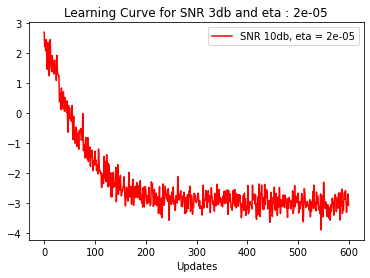

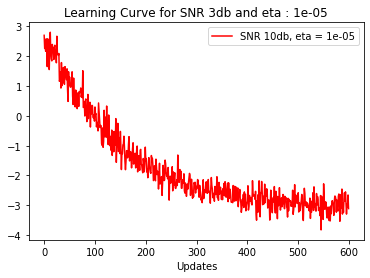

In [9]:
import matplotlib.pylab as plt

v = [data_dic['matched_10_v'][:], data_dic['matched_3_v'][:]]
z = [data_dic['matched_10_z'][:], data_dic['matched_3_z'][:]]

def compute_mse(err_mat):
    inp = err_mat
    sq_sum = []
    for i in range(len(inp)):
        res = 0
        for j in range(len(inp[0])):
            res+=inp[i][j]
        sq_sum.append(10*np.log10(res/len(inp[0])))
    return sq_sum

def lms(step,v,z):
    l = len(v)
    w = np.array([0,0,0])
    se = []
    #E = 0
    for i in range(l):
        E = []
        for j in range(len(v[i])):
            e = z[i][j]-w.T@v[i][j]
            w = np.add(w,step * (e) * v[i][j])
            E.append(e**2)
        se.append(E)
    # Taking MSE (average of (z − zˆ )2) averaged over all sequences
    mse = compute_mse(se)
    return w, mse


step = np.linspace(1e-4, 1e-5, num=10)
for stp in step:
    w,mse = lms(stp,v[1],z[1])
    # show results
    plt.title("Learning Curve for SNR 3db and eta : "+str(round(stp,6)))
    plt.xlabel("Updates")
    plt.plot(mse,"r", label="SNR 10db, eta = "+str(round(stp,6)))
    plt.legend()
    plt.show()


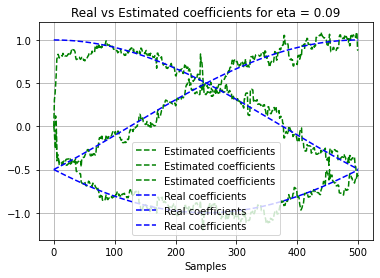

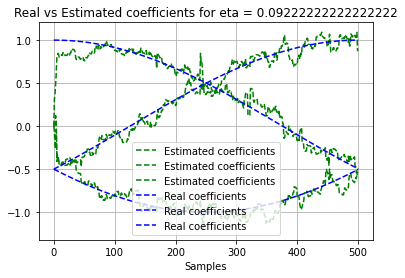

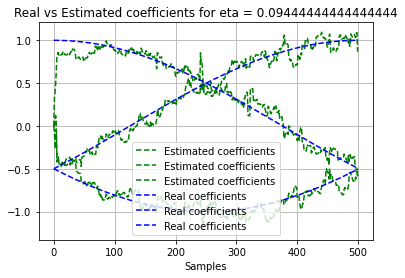

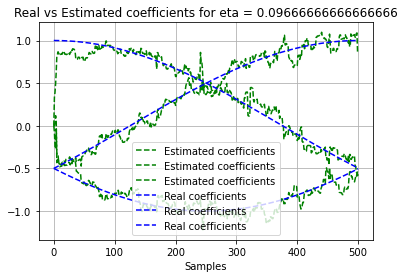

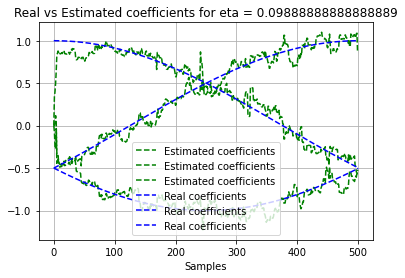

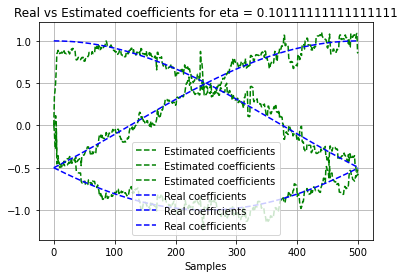

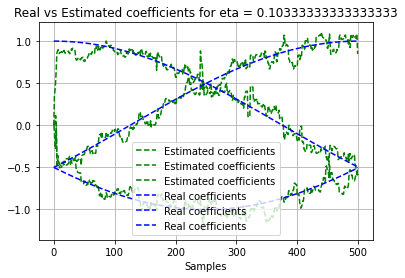

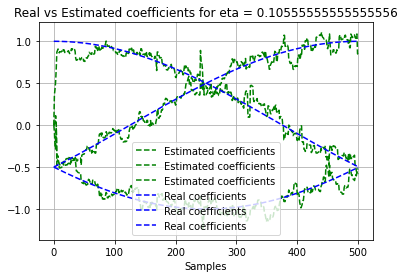

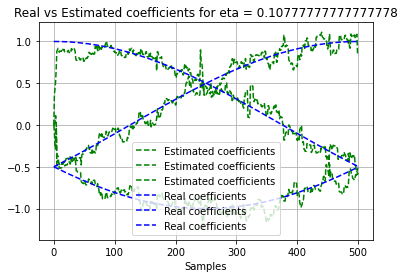

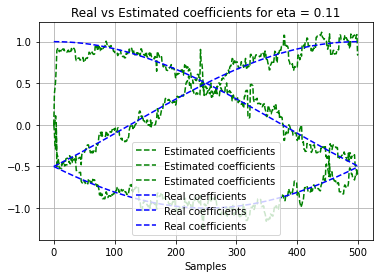

In [10]:
import matplotlib.pylab as plt

v = data_dic['timevarying_v']
z = data_dic['timevarying_z']

def lms(step,v,z):
    l = len(v)
    w = np.array([0,0,0])
    se = []
    coef = []
    for i in range(l):
        e = z[i]-w.T@v[i]
        w = np.add(w,step * (e) * v[i])
        coef.append(w)
    se.append(e**2)
    return coef, w, se

coeffs = data_dic['timevarying_coefficents']

step = np.linspace(0.09, 0.11, num=10)
#fig= plt.figure(figsize=(17,36))
number_of_subplots=10

for stp in step:
    coef,w,mse = lms(stp,v,z)
    plt.figure()
    plt.title('Real vs Estimated coefficients for eta = '+str(stp))
    plt.plot(coef, 'g--', label='Estimated coefficients')
    plt.plot(coeffs, 'b--', label='Real coefficients')
    plt.grid()
    plt.legend()
    plt.xlabel('Samples')
    plt.show()


# for i,stp in enumerate(step):
#     ax1 = subplot(number_of_subplots,2,i+1)
#     w,mse = lms(stp,v,z)
#     ax1.title.set_text('Plot for eta : '+str(stp))
#     ax1.plot(mse,"b")

# plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
# plt.show()


### The learning rate η = 0.1 is a good estimate where the LMS algorithm tracks the coefficient variations.

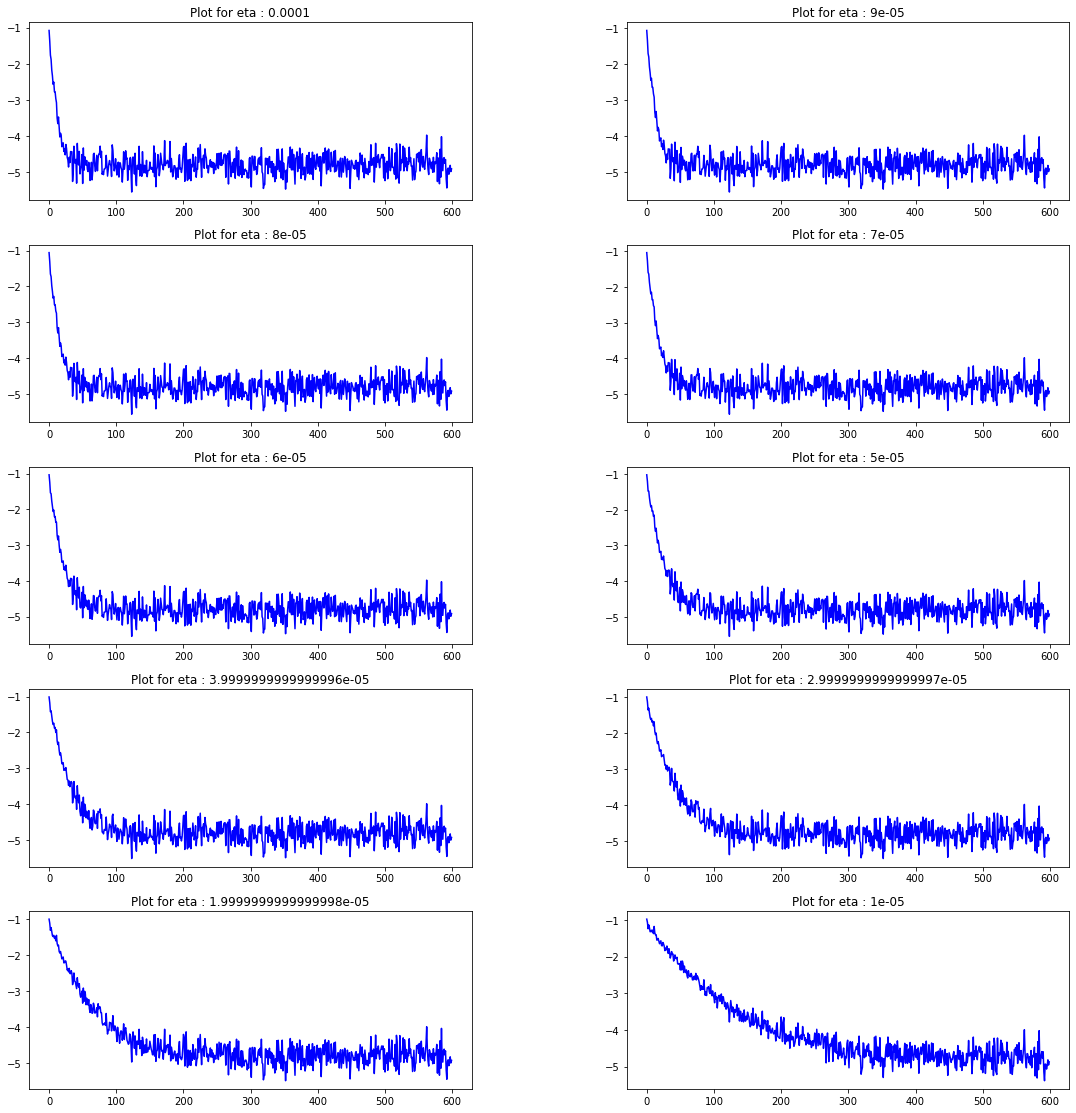

In [11]:
v = data_dic['mismatched_v']
z = data_dic['mismatched_y']

def compute_mse(err_mat):
    inp = err_mat
    sq_sum = []
    for i in range(len(inp)):
        res = 0
        for j in range(len(inp[0])):
            res+=inp[i][j]
        sq_sum.append(10*np.log10(res/len(inp[0])))
    return sq_sum

def lms(step,v,z):
    l = len(v)
    w = np.array([0,0,0])
    se = []
    #E = 0
    for i in range(l):
        E = []
        for j in range(len(v[i])):
            e = z[i][j]-w.T@v[i][j]
            w = np.add(w,step * (e) * v[i][j])
            E.append(e**2)
        se.append(E)
    # Taking MSE (average of (z − zˆ )2) averaged over all sequences
    mse = compute_mse(se)
    return w, mse


step = np.linspace(1e-4, 1e-5, num=10)
number_of_subplots=10

fig= plt.figure(figsize=(17,36))
for i,stp in enumerate(step):
    ax1 = plt.subplot(number_of_subplots,2,i+1)
    w,mse = lms(stp,v,z)
    ax1.title.set_text('Plot for eta : '+str(stp))
    ax1.plot(mse,"b")

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
plt.show()

In [ ]:
from scipy import signal

x = data_dic['mismatched_x']
y = data_dic['mismatched_y']

def autocorr(x):
    result = signal.correlate2d(x, x, mode='full')
    return result[result.size/2:]

Rxx= autocorr(x)
Rxy= np.corrcoef(x,y)
Ryx= np.corrcoef(y,x)
Ryy= autocorr(y)
Rx_inv = np.linalg.inv(Rxx)

res = np.trace(Ryy - (Ryx@Rx_inv@Rxy))
print("LLSE",res)

Is this value lower than the LMS learning curve after convergence?
Yes. It is lower than the LMS learning curve after convergence